# Análisis de Algoritmos de Machine Learning

Miembros:
- Francisco Castillo
- Ricardo Méndez
- Andrés Montoya
- Sara Pérez

## Librerías

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification

Para ambos modelos utilizaremos la misma cantidad de tamaños de observaciones y mismas constantes.

In [2]:
SEED = 2024  # Semilla para la generación de números aleatorios y permitir reproducibilidad
TEST_SIZE = 0.3  # Proporción de observaciones en el conjunto de prueba
N_FEATURES = 100  # Número de características en cada observación

In [3]:
sample_sizes = [i for i in range(200, 100_000, 1_500)]
print(f"Cantidad de tamaños de observaciones: {len(sample_sizes)}")
sample_sizes

Cantidad de tamaños de observaciones: 67


[200,
 1700,
 3200,
 4700,
 6200,
 7700,
 9200,
 10700,
 12200,
 13700,
 15200,
 16700,
 18200,
 19700,
 21200,
 22700,
 24200,
 25700,
 27200,
 28700,
 30200,
 31700,
 33200,
 34700,
 36200,
 37700,
 39200,
 40700,
 42200,
 43700,
 45200,
 46700,
 48200,
 49700,
 51200,
 52700,
 54200,
 55700,
 57200,
 58700,
 60200,
 61700,
 63200,
 64700,
 66200,
 67700,
 69200,
 70700,
 72200,
 73700,
 75200,
 76700,
 78200,
 79700,
 81200,
 82700,
 84200,
 85700,
 87200,
 88700,
 90200,
 91700,
 93200,
 94700,
 96200,
 97700,
 99200]

Para poder analizar los resultados de los modelos:

In [4]:
degrees = [1, 2, 3, 4, 10]

In [5]:
def calculate_r2(x, y, poly):
    y_pred = poly(x)
    return r2_score(y, y_pred)

In [6]:
def show_results(results: list[dict]) -> None:
    training_times = [result['training_time'] for result in results]
    
    polynomial_fits = []
    
    for degree in degrees:
        poly = np.poly1d(np.polyfit(sample_sizes, training_times, degree))
        polynomial_fits.append(poly)
        r2 = calculate_r2(sample_sizes, training_times, poly)
        print(f"Degree: {degree}\tR^2: {r2:.5f}")
    
    # Create a grid of plots
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    
    # Main plot with all polynomials
    axs[0, 0].scatter(sample_sizes, training_times, color='blue', label='Training Data')
    for degree, fit in zip(degrees, polynomial_fits):
        axs[0, 0].plot(sample_sizes, fit(sample_sizes), label=f'Polynomial Fit (Degree {degree})')
    axs[0, 0].set_xlabel('Sample Size')
    axs[0, 0].set_ylabel('Training Time (s)')
    axs[0, 0].set_title('Training Time vs. Sample Size (All Polynomials)')
    axs[0, 0].legend()
    
    # Individual plots for each polynomial
    for i, (degree, fit) in enumerate(zip(degrees, polynomial_fits)):
        row = (i + 1) // 3
        col = (i + 1) % 3
        axs[row, col].scatter(sample_sizes, training_times, color='blue', label='Training Data')
        axs[row, col].plot(sample_sizes, fit(sample_sizes), label=f'Polynomial Fit (Degree {degree})')
        axs[row, col].set_xlabel('Sample Size')
        axs[row, col].set_ylabel('Training Time (s)')
        axs[row, col].set_title(f'Training Time vs. Sample Size (Polynomial Degree {degree})')
        axs[row, col].legend()
    
    plt.tight_layout()
    plt.show()

## Regresión Lineal

## Naive Bayes


### Descripción
Naive Bayes es un algoritmo de clasificación supervisada basado en el teorema de Bayes con una suposición "ingenua" de independencia entre las características. A pesar de esta suposición optimista, Naive Bayes ha demostrado ser efectivo en una amplia gama de problemas de clasificación.

### Parámetros
El único parámetro de NB es el alpha. Este especifica la fuerza que se le da al suavizado de Laplace (Laplace Smoothing). Mientras más alto sea el alpha, más fuerte será el suavizado.

### Valores de Retorno
 - **class_count_**: Una matriz que almacena el número de muestras de entrenamiento observadas en cada clase. 
 - **class_prior_**: La probabilidad a priori de cada clase. Es decir, la probabilidad de que una muestra pertenezca a cada clase antes de observar los datos de entrada.
 - **classes_**: Las etiquetas de las clases.
 - **theta_**: Una matriz que almacena la media de cada característica por clase en el caso de GaussianNB (Naive Bayes Gaussiano). Específicamente, theta_[i, j] es la media de la característica j para la clase i.
 - **sigma_**: Una matriz que almacena la varianza de cada característica por clase en el caso de GaussianNB (Naive Bayes Gaussiano). Específicamente, sigma_[i, j] es la varianza de la característica j para la clase i.

### Aplicación y Justificación:
La aplicabilidad de Naive Bayes radica en su simplicidad y eficiencia computacional. Debido a su suposición de independencia entre las características, Naive Bayes puede funcionar bien incluso en conjuntos de datos de alta dimensionalidad y es particularmente útil cuando hay una gran cantidad de características. Además, Naive Bayes tiene una complejidad computacional baja durante el entrenamiento y la predicción, lo que lo hace adecuado para conjuntos de datos grandes. Sin embargo, su rendimiento puede verse afectado si las características no son realmente independientes o si hay una falta de datos de entrenamiento.

Fuentes: [Documentación Naive Bayes SKlearn](https://scikit-learn.org/stable/modules/naive_bayes.html)

## Análisis Teórico
El algoritmo de Naive Bayes cuenta con 2 operaciones principales durante el proceso de entrenamiento:
1. Recorrido de datos de entrenamiento

    Este algoritmo recorre todos los datos de entrenamiento y para cada uno actualiza su probabilidad condicional para cada característica de la clase. Ya que para poder realzar esto, es necesario iterar a través de cada uno de los ejemplos de entrenamiento y para cada uno de estos, iterar a través de todas las características, la complejidad resultante de este paso es de $O(n*d)$. Donde $n$ es el número de ejemplos de entrenamiento y $d$ el de características.

2. Cálculo de probabilidad

    Como se pudo observar en el primer paso, luego de recorrer los datos de entrenamiento, es necesario calcular las probabilidades para cada característica de las clases. Esto se consigue dividiendo el conteo de cada característica, para todas las clases, por el conteo total de dicha clase. Esto se realiza recorriendo todas las clases y todas las características, por lo que se obtiene una complejidad de $O(c*d)$. Donde $c$ es el número de clases y $d$ el de características.

Al tomar en cuenta estas 2 operaciones, se concluye que la complejidad total del algoritmo es de:
$$
O(n*d)+O(c*d) = O((n*d)+(c*d))
$$
En la práctica, los modelos se entrenan con datos que poseen muchas más características $d$ que clases $c$, por lo que $d$ puede absorber a $c$ y se obtiene lo siguiente:
$$
O((n*d)+d) = O(n*d)
$$  

## Análisis Empírico

In [7]:
naive_bayes_results = []

In [8]:
for sample_size in sample_sizes:
    current_result = {
        'sample_size': sample_size,
        'training_time': None,
        'prediction_time': None,
        'metrics': {
            'accuracy': None,
        }
    }
    bayes = GaussianNB()

    X, y = make_classification(n_samples=sample_size, n_features=N_FEATURES, random_state=SEED)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)
    
    # Measure training time
    start_time = time.perf_counter()
    bayes.fit(X_train, y_train)
    training_time = time.perf_counter() - start_time
    current_result['training_time'] = training_time
    
    # Measure prediction time
    start_time = time.perf_counter()
    y_pred = bayes.predict(X_test)
    prediction_time = time.perf_counter() - start_time
    current_result['prediction_time'] = prediction_time
    
    # Calculate metrics
    accuracy = bayes.score(X_test, y_test)
    
    
    naive_bayes_results.append(current_result)

### Resultados

Degree: 1	R^2: 0.73315
Degree: 2	R^2: 0.77124
Degree: 3	R^2: 0.79019
Degree: 4	R^2: 0.81222
Degree: 10	R^2: 0.95583


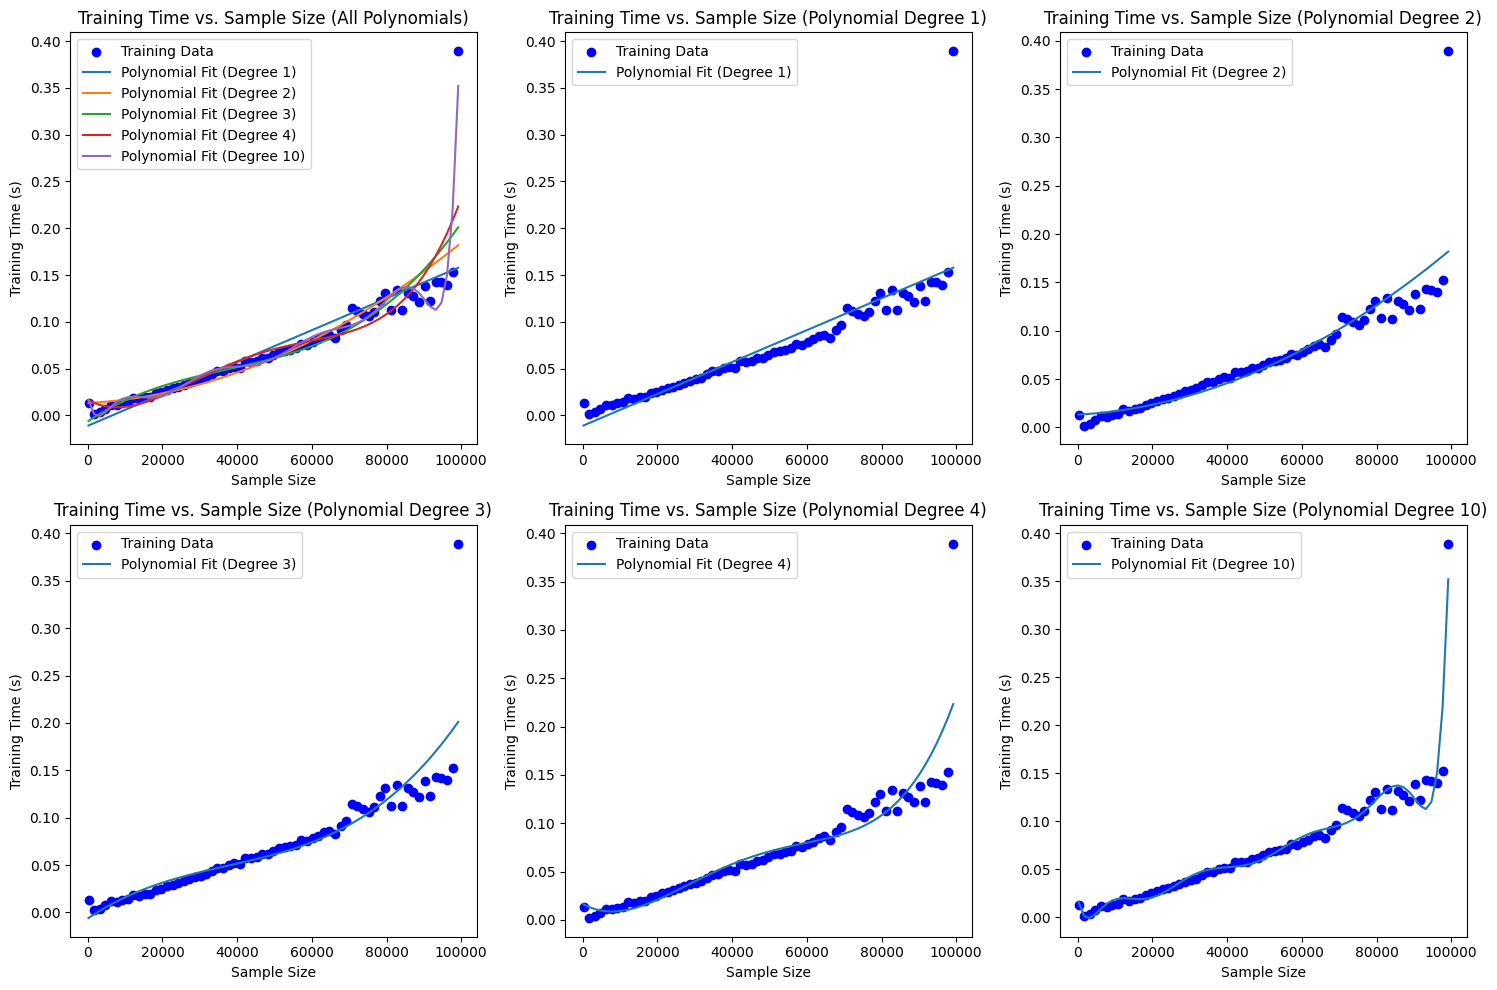

In [9]:
show_results(naive_bayes_results)

### Comparación teórico-empírica
- No va a quedar igual
- Lo empírico es muy dependiente de la máquina en la que corre

## Linear Regression

### Descripción
La Regresión Lineal es un algoritmo de aprendizaje supervisado que se utiliza para predecir el valor de una variable dependiente en función de una o más variables independientes. Busca encontrar la mejor línea de ajuste que minimice la suma de los errores cuadrados entre los valores observados y los valores predichos.

### Parámetros
La Regresión Lineal no tiene parámetros adicionales en su forma básica. Sin embargo, se pueden considerar variantes como la regularización Lasso (L1) o Ridge (L2), que tienen parámetros como `alpha` que controlan la fuerza de la regularización.

### Valores de retorno
La Regresión Lineal proporciona varios valores de retorno después de ser entrenada con los datos:
- **coef_**: Un array que almacena los coeficientes de la regresión lineal para cada característica.
- **intercept_**: El término de intersección de la regresión lineal.
- **rank_**: El rango de la matriz de diseño.
- **singular_**: Los valores singulares de la matriz de diseño.

En el caso de la regresión lineal múltiple, `coef_` proporcionará un coeficiente para cada característica de entrada.

### Aplicación y Justificación:
La Regresión Lineal es una técnica de aprendizaje supervisado utilizada para predecir valores continuos en función de características de entrada. Es especialmente útil cuando la relación entre las características y la variable objetivo es lineal y la interpretabilidad del modelo es importante. Aunque puede verse limitada por relaciones no lineales o multicolinealidad, ofrece una baja complejidad computacional durante el entrenamiento y la predicción, lo que la hace eficiente en términos de recursos y escalable para conjuntos de datos grandes. Este aspecto computacional hace que la Regresión Lineal sea una opción atractiva en aplicaciones donde se requiere una rápida implementación y análisis de grandes volúmenes de datos.


Fuentes: [Documentación Linear Regression SKlearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


### Análisis Teórico
* INSERTAR TASA DE CRECIMIENTO (en notación asintótica) Y TIEMPO DE EJECUCIÓN (como conteo de instrucciones o relación de recurrencia)

### Análisis Empírico

In [10]:
NOISE = 0.1  # Desviación estándar del ruido añadido a las observaciones

In [11]:
linear_regression_results = []

In [12]:
for sample_size in sample_sizes:
    current_result = {
        'sample_size': sample_size,
        'training_time': None,
        'prediction_time': None,
        'metrics': {
            'mean_squared_error': None,
            'r2_score': None
        }
    }
    linear = LinearRegression()

    X, y = make_regression(n_samples=sample_size, n_features=N_FEATURES, noise=NOISE, random_state=SEED)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)
    
    # Measure training time
    start_time = time.perf_counter()
    linear.fit(X_train, y_train)
    training_time = time.perf_counter() - start_time
    current_result['training_time'] = training_time
    
    # Measure prediction time
    start_time = time.perf_counter()
    y_pred = linear.predict(X_test)
    prediction_time = time.perf_counter() - start_time
    current_result['prediction_time'] = prediction_time
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    current_result['metrics']['mean_squared_error'] = mse
    current_result['metrics']['r2_score'] = r2
    
    linear_regression_results.append(current_result)

### Resultados

Degree: 1	R^2: 0.39781
Degree: 2	R^2: 0.40353
Degree: 3	R^2: 0.44868
Degree: 4	R^2: 0.57266
Degree: 10	R^2: 0.64865


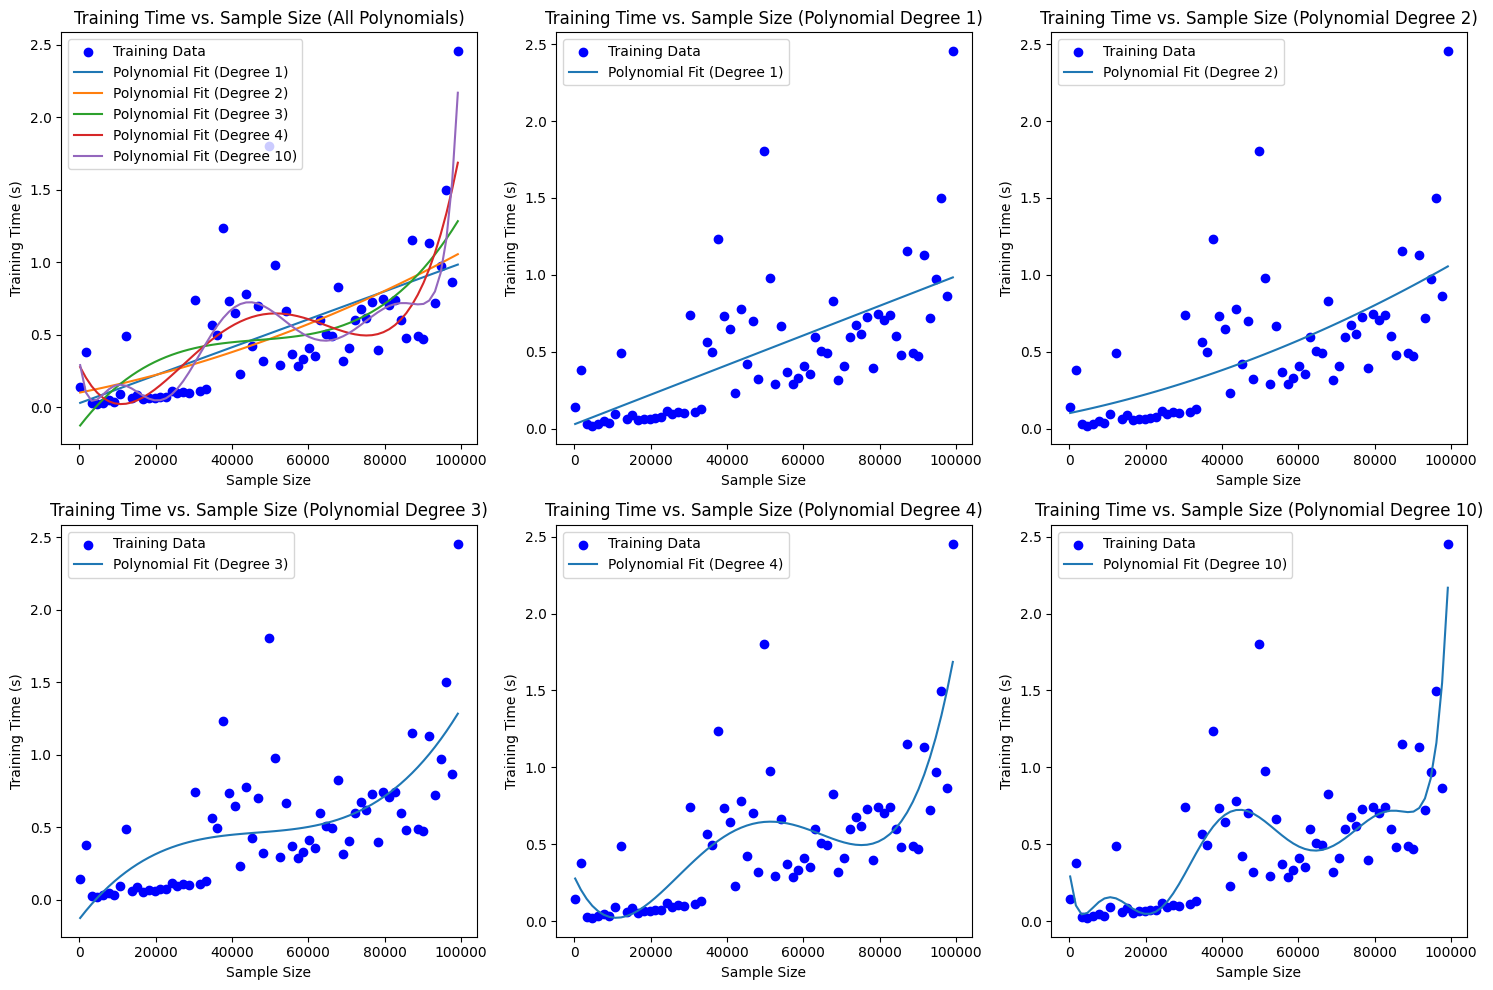

In [13]:
show_results(linear_regression_results)

### Comparación teórico-empírica
- No va a quedar igual
- Lo empírico es muy dependiente de la máquina en la que corre